# noised_robot_model

移動・観測に生じる雑音・バイアスをモデルに追加する

In [2]:
from sys import path
path.append('../src/')

import importlib
from math import pi

import worlds
import robots
import agents
import maps
import landmarks
import sensors
import pdfs
    
def reload():
    importlib.reload(worlds)
    importlib.reload(robots)
    importlib.reload(agents)
    importlib.reload(maps)
    importlib.reload(landmarks)
    importlib.reload(sensors)
    importlib.reload(pdfs)
    
reload()

移動に対するノイズ

なにか踏んだら姿勢が少しずれる想定

いつ踏んでしまうかについては，指数分布に従うものとする

$$
p(x \mid \lambda) = \lambda \exp \left( -\lambda x \right)
$$

<IPython.core.display.Javascript object>


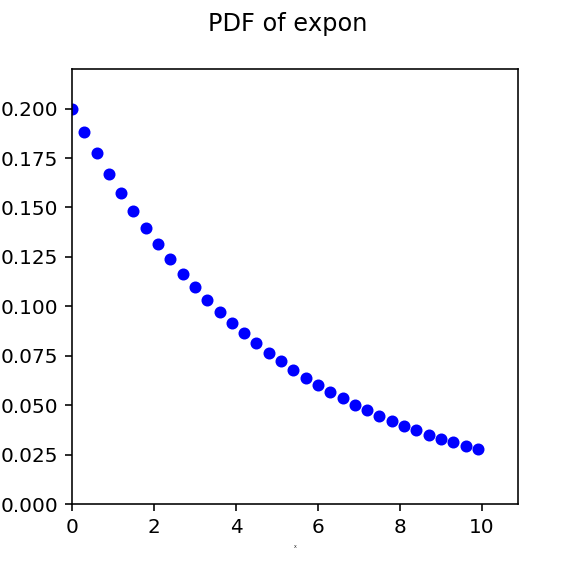

In [3]:
# 指数分布のプロット
import numpy as np
reload()

# 小石を踏むまで進む量の期待値
expected_travel_distance = 5.0
plotter = pdfs.ExponPdfPlotter(scale=expected_travel_distance)
plotter.plot([x for x in np.arange(0., 10., 0.3)])

<IPython.core.display.Javascript object>


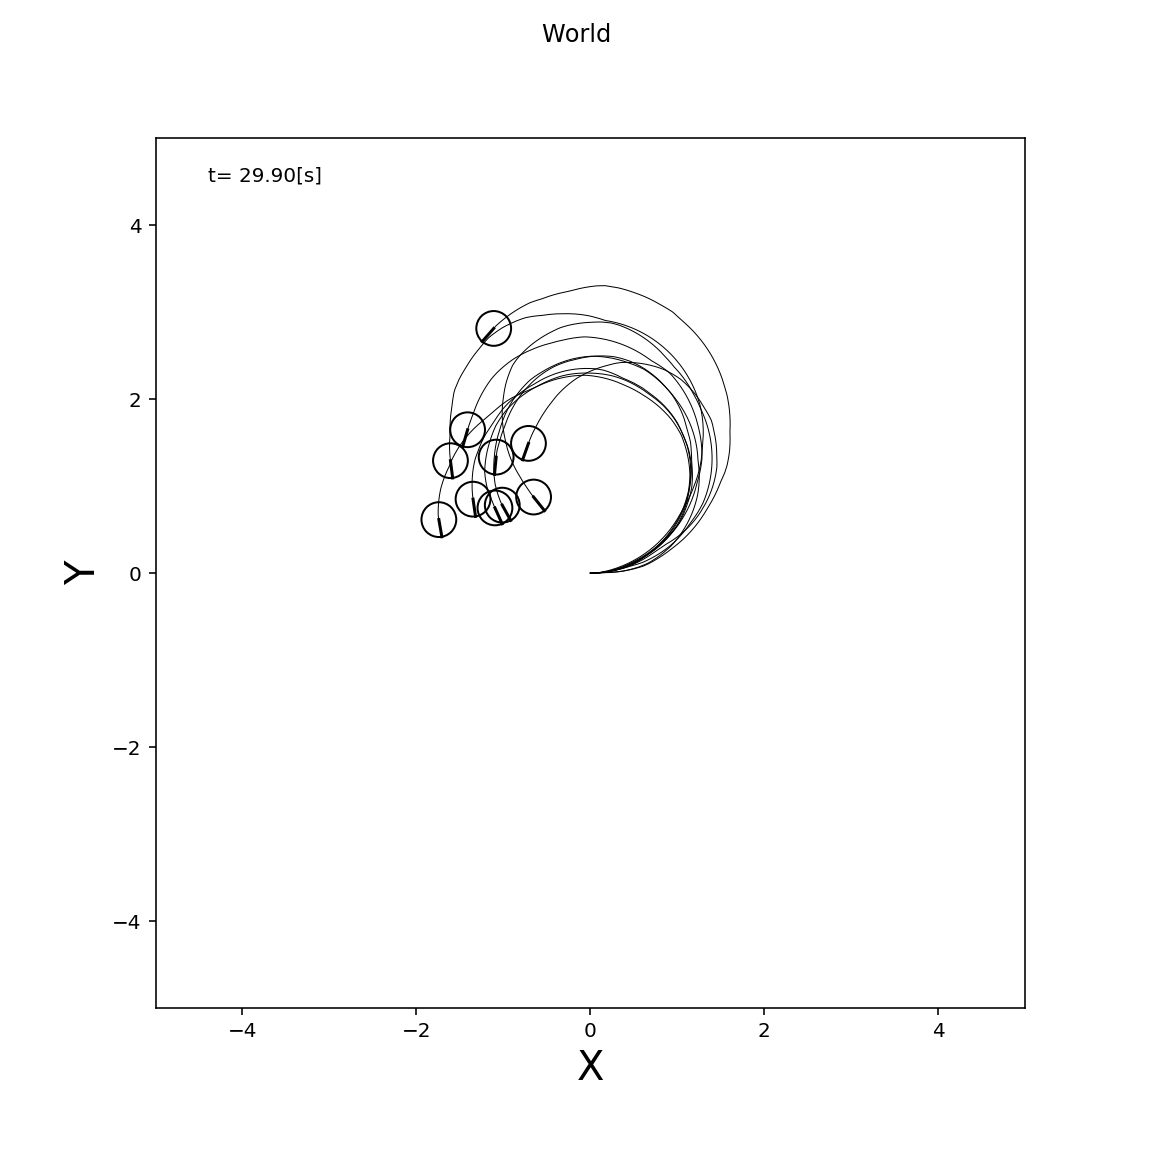

In [6]:
# なにか踏むことを考慮したときのロボット軌跡
# 10個ロボットを生成して，それぞれの軌跡を表示する
reload()

world = worlds.World(30., 0.1, debuggable=False)

for i in range(10):
    circling = agents.Agent(0.2, 10./180.*pi)
    robot = robots.Robot(
        np.array([0., 0., 0.]).T, sensor=None, agent=circling, color='black')
    world.append(robot)
    
world.draw()

制御指令にバイアスを与える

正規分布からドローしておいた値を使い続けることで実現する

<IPython.core.display.Javascript object>


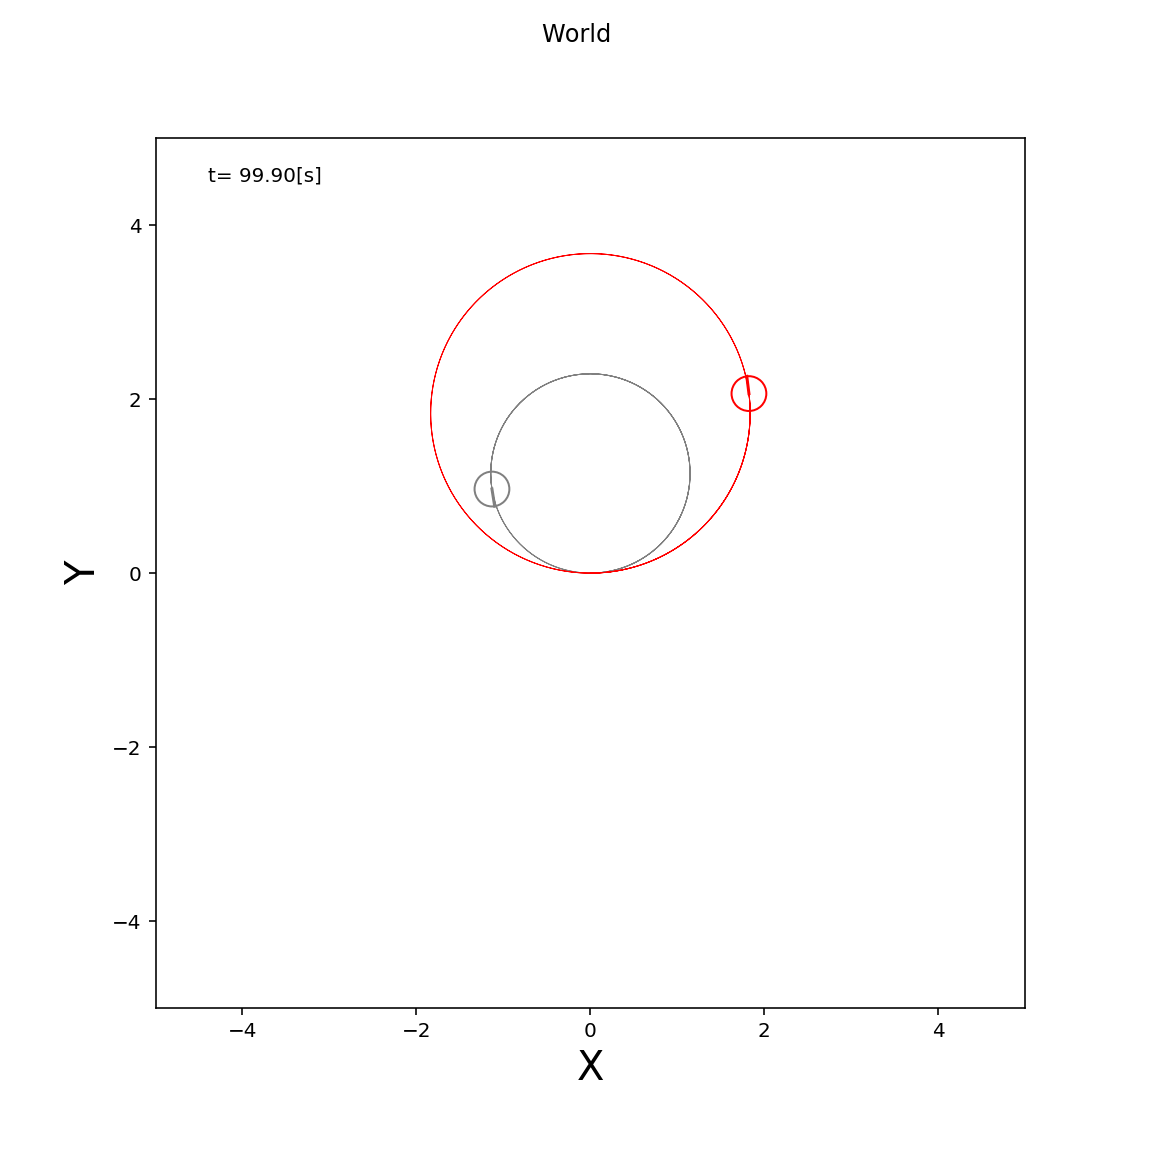

In [10]:
# バイアスの有無それぞれの場合でのロボット軌跡をみる
reload()
import copy

world = worlds.World(30., 0.1, debuggable=True)

circling = agents.Agent(0.2, 10./180.*pi)

no_bias_robot = robots.IdealRobot(
    np.array([0., 0., 0.]).T, sensor=None, agent=circling, color='gray')
bias_robot = robots.Robot(
    np.array([0., 0., 0.]).T, sensor=None, agent=circling, color='red',
    noise_per_meter=0., bias_rate_stds=(0.2, 0.2))

world.append(no_bias_robot)
world.append(bias_robot)

world.draw()

スタックしているかどうかのシミュレーション機能を追加した

スタックするまでにかかる時間，抜け出すまでにかかる時間はそれぞれ指数分布に従うとする

<IPython.core.display.Javascript object>


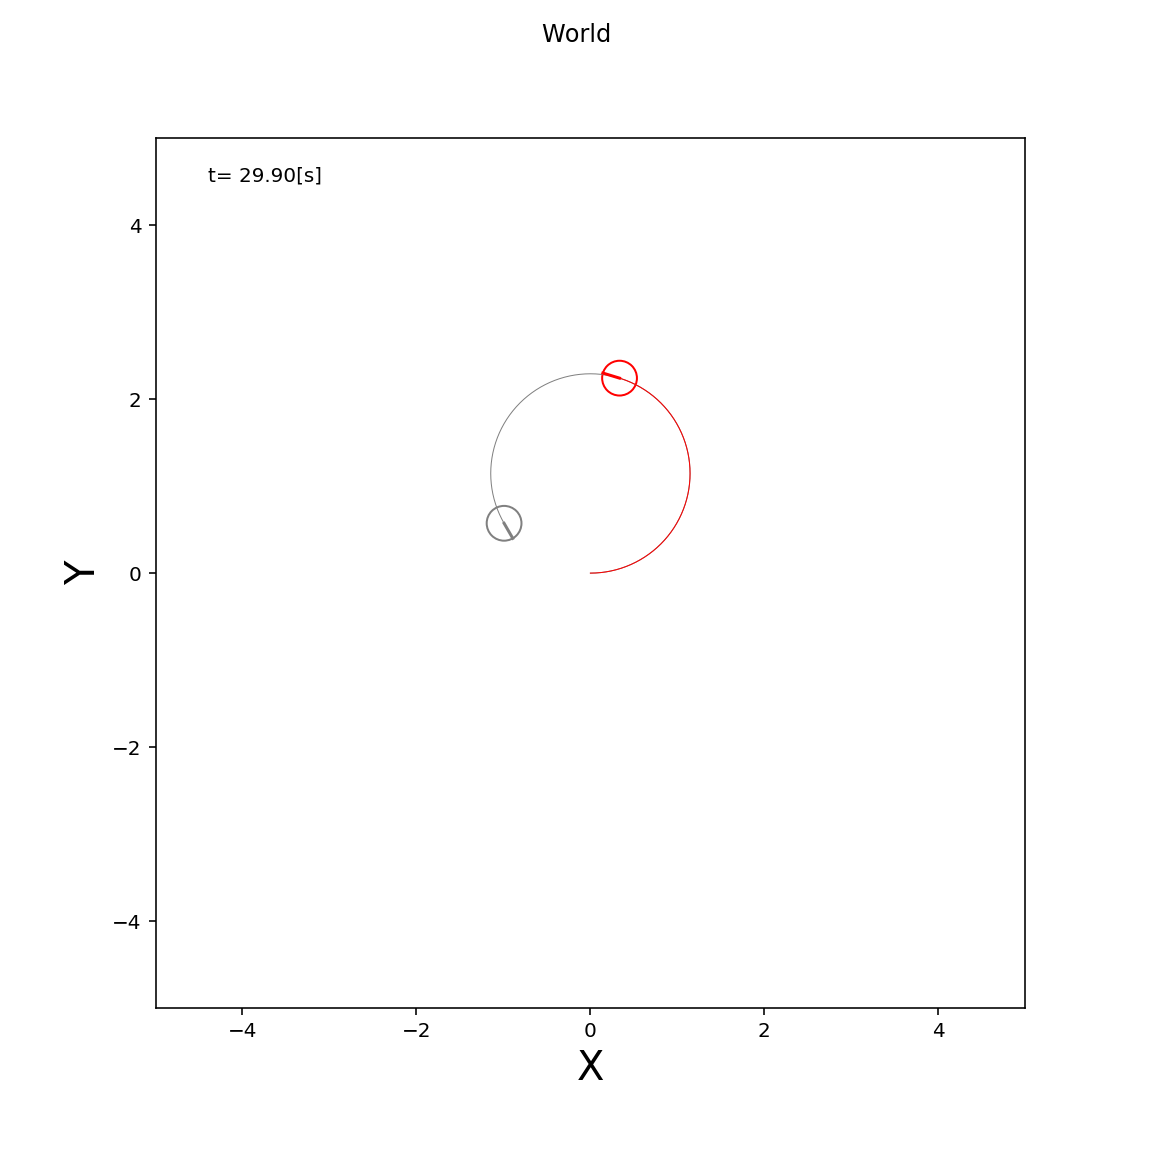

In [16]:
# みてみる
reload()
import copy

world = worlds.World(30., 0.1, debuggable=False)

circling = agents.Agent(0.2, 10./180.*pi)

no_stuck_robot = robots.IdealRobot(
    np.array([0., 0., 0.]).T, sensor=None, agent=circling, color='gray')
stuckable_robot = robots.Robot(
    np.array([0., 0., 0.]).T, sensor=None, agent=circling, color='red',
    noise_per_meter=0., bias_rate_stds=(0.0, 0.0),
    expected_stuck_time=5., expected_escape_time=5.)

world.append(no_stuck_robot)
world.append(stuckable_robot)

world.draw()